In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


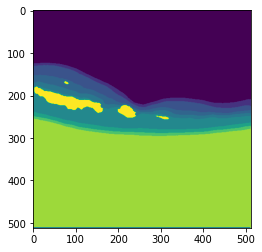

In [34]:
imfile = "/home/nonari/Documentos/test_results/resnet34_cp_sa/seg_9_32.png"
im = cv.imread(imfile, cv.IMREAD_GRAYSCALE)
plt.imshow(im)
plt.show()

In [35]:
def rearrange_mask(mask):
    sparse_labels = np.unique(mask)
    for idx, l in enumerate(sparse_labels):
        mask[mask == l] = idx + 1

In [36]:
rearrange_mask(im)


In [37]:
im[im != 10] = 0
im[im == 10] = 1

In [22]:
stats = cv.connectedComponentsWithStats(im)
areas = stats[2][1:, 4]
total_count = len(areas)

In [39]:
sep = [0, 0.2, 0.4, 0.6, 0.8, 1]
centroids = stats[3][1:,0]

x, y = im.shape
areas_zone = []
count_zone = []
for i in range(5):
    p1, p2 = sep[i], sep[i+1]
    ini, fin = int(p1 * x), int(p2 * x)
    area = (im[:, ini:fin] == 1).sum()
    areas_zone.append(area)
    count_l = ini < centroids
    count_g = fin > centroids
    count = np.logical_and(count_l, count_g).sum()
    count_zone.append(count)

In [40]:
conts, hier = cv.findContours(im, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

measure_by_cist = {}
for c in conts:
    _, _, w, h = cv.boundingRect(c)
    x, y = c[0,0]
    idx = stats[1][y, x]
    measure_by_cist[idx] = (w, h)
#cv.drawContours(im, conts, -1, 2)